 # Title: Discovering Risk Factors for Diabetes: An Art more than a Science

# Research Question
 Using Logistic Regression can a machine learning model accurately predict whether or not the patients in the dataset have diabetes or not?


# **Contents**
- [**Research Question**](#Research-Question)
- [**Import Libraries**](#Import-Libraries)
  - [Data Dictionary](#Data-Dictionary)
- [**Load Data**](#Load-Data)
- [**Exploratory Data Analysis (EDA)**](#Exploratory-Data-Analysis-(EDA))
  - [Check Null Values](#Check-Null-Values)
  - [Data Types](#Data-Types)
  - [Summery Statistics](#Assess-Nulls)
  - [Exploring Skewness](#Exploring-Skewness)
  - [Handeling Outliers](#Handeling-Outliers)
  - [Revisiting Skewness after Outlier handeling](#Revisiting-Skewness-after-Outlier-handeling)
- [**Relationship between Independent variable and features**](#Relationship-between-Independent-variable-and-features)
- [**Feature Engineering**](#Feature-Engineering)
  - [Scale features](#Scale-features)
  - [Assess Multicollinearity](#Assess-Multicollinearity)
- [**Model Building**](#Model-Building)
  - [Split Test and Train data](#Split-Test-and-Train-data)
- [**Model Results and Performance**](#Model-Results-and-Performance)
  - [Accuray](#Accuracy)
  - [Confusion Matrix](#Confusion-Matrix)
  - [Precision](#Precision)
  - [Recall](#Recall)
  - [F1_Score](#F1_Score)
  - [Area Under Curve](#Area-Under-Curve)
- [**Conclusion Summary**](#Conclusion-Summary)

## Data Dictionary:
| Column Name              | Description                                                          |
| -------------            |-------------                                                         | 
| Pregnancies              | Number of times pregnant                                             | 
| Glucose                  |Plasma Glucose level Oral Glucose Test                                |  
| Blood Pressure           | Diastolic Blood pressure in mmHg                                     | 
| Skin Thickness           | Triceps skin fold thickness in mm                                    |   
| Insulin.                 | 2-Hour insulin level in mU/ml                                        |
| BMI                      | Body Mass Index in Kg                                                |
| Diabetes Pedagree Func.  | Diabetes Pedigree Function                                           |
| Age                      | Age (years)                                                          |
| Outcome                  | Class Variable (0 or 1)                                              |


# Import Libraries

In [56]:
import pandas as pd # for manipulating data
import numpy as np # Linear Algebra operations
from sklearn.preprocessing import StandardScaler # Standardize feature selection value
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor #Checking multicollinearity in the dependent variables
from sklearn.model_selection import train_test_split # Model selection and split
from sklearn import metrics # Calculation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score #Model performance for Logistic Regression
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations


# Load Data

In [57]:
diabetes = pd.read_csv('diabetes.csv') # Reading the Data

# Exploratory Data Analysis (EDA)

### Check Null Values

Exploring the possibility of missing values. There are no missing values in this dataset. 

In [58]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Types

Ensuring our data types are correct before doing further exploration. Our classes are numeric so this makes sense to see integers and floats. 

In [59]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Summery Statistics

We can see see outliers in summery statistics. In pregnancy, 75% of the data lies within 6. Therefore when we see a max of 17 we know that is an outlier. In insulin we can also conclude the same thing, as 75% of the data is within 127.25, therefore 846 is also considered an outlier. 

In [60]:
diabetes.describe().style.set_caption('There are 768 rows, with potential outliers.')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Exploring Skewness

We can see there is some skewness in the data, let's deal with data.
Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

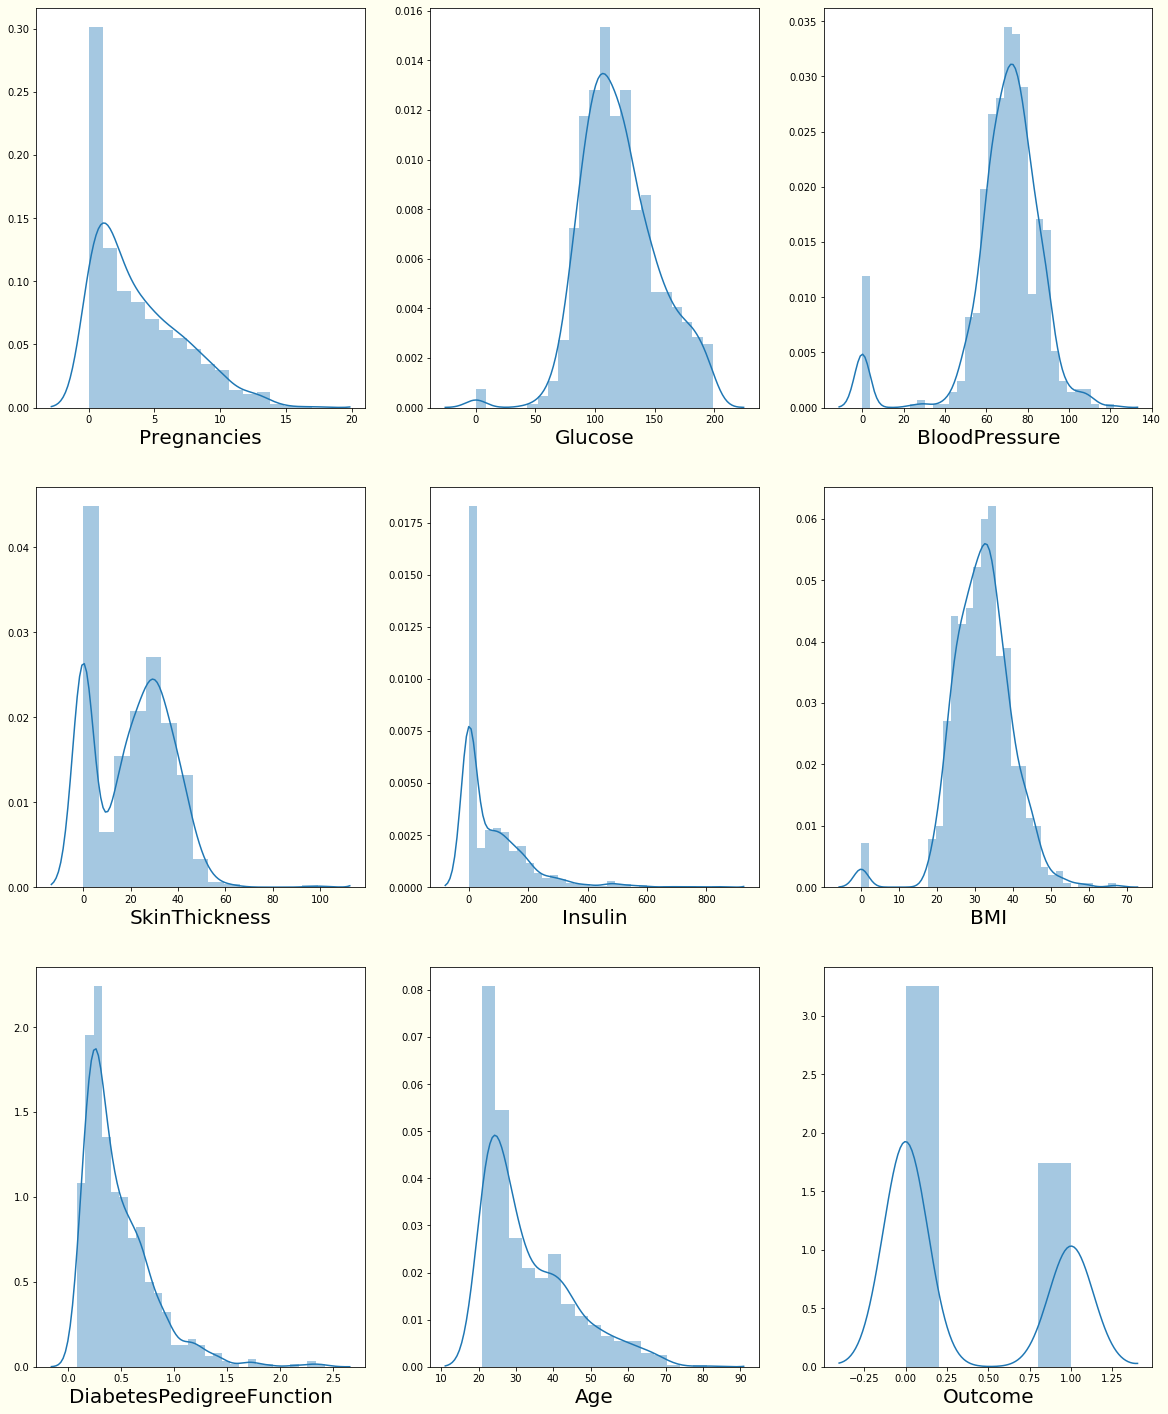

In [61]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='ivory')
plotnumber = 1

for column in diabetes:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Handeling Outliers

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

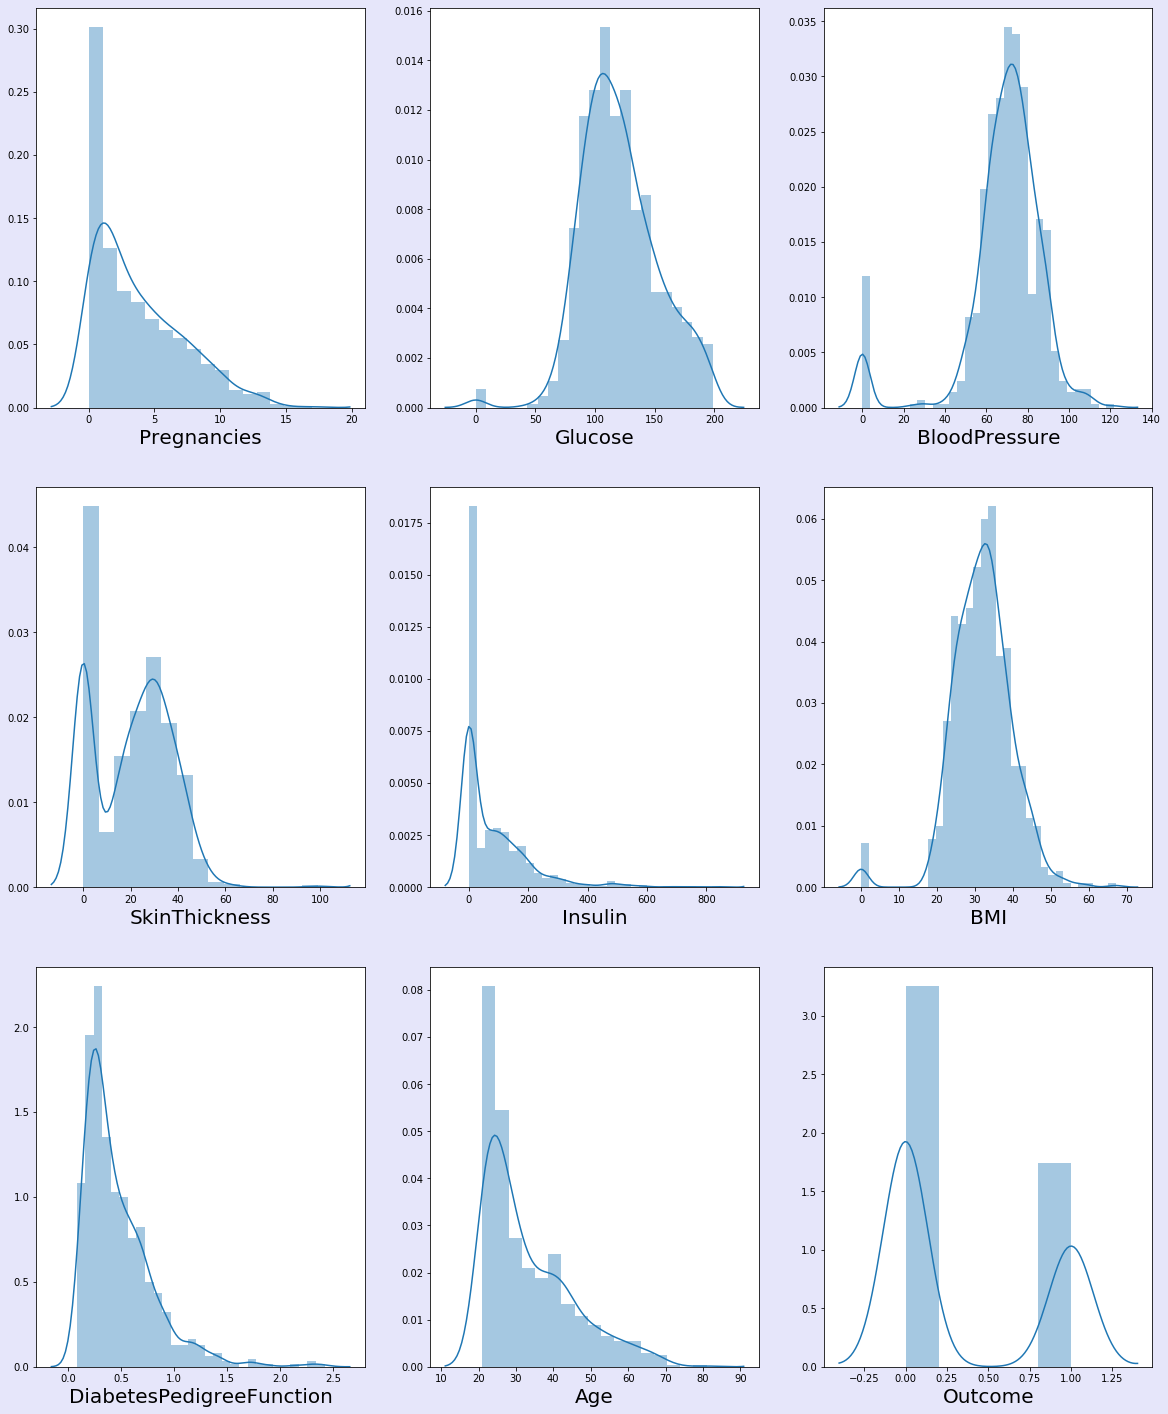

In [62]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='lavender')
plotnumber = 1

for column in diabetes:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Visualizing Outliers:

Below a box and whisker plot depicts what was summerized in the summery statistics. As one can denote the numerous outliers that are portrayed in the insulin class. 

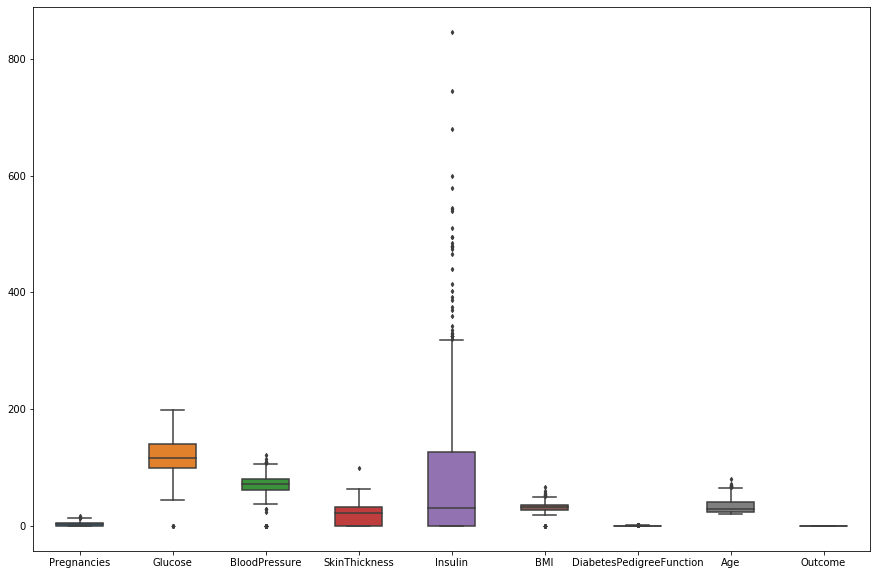

In [90]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=diabetes, width= 0.5,ax=ax,  fliersize=3)


# Feature Engineering

We are utilizing feature engineering to clean our independent variables to ensure model accuracy. 
- The following were removed: 
    - The top 2% data from the Pregnancies column.
    - The top 1% data from the BMI column.
    - The top 1% data from the SkinThickness column
    - The top 5% data from the Insulin column
    - The top 1% data from the DiabetesPedigreeFunction column.
    - The top 1% data from the Age column

In [64]:
q = diabetes['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = diabetes[diabetes['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

### Revisiting Skewness after Outlier handeling

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

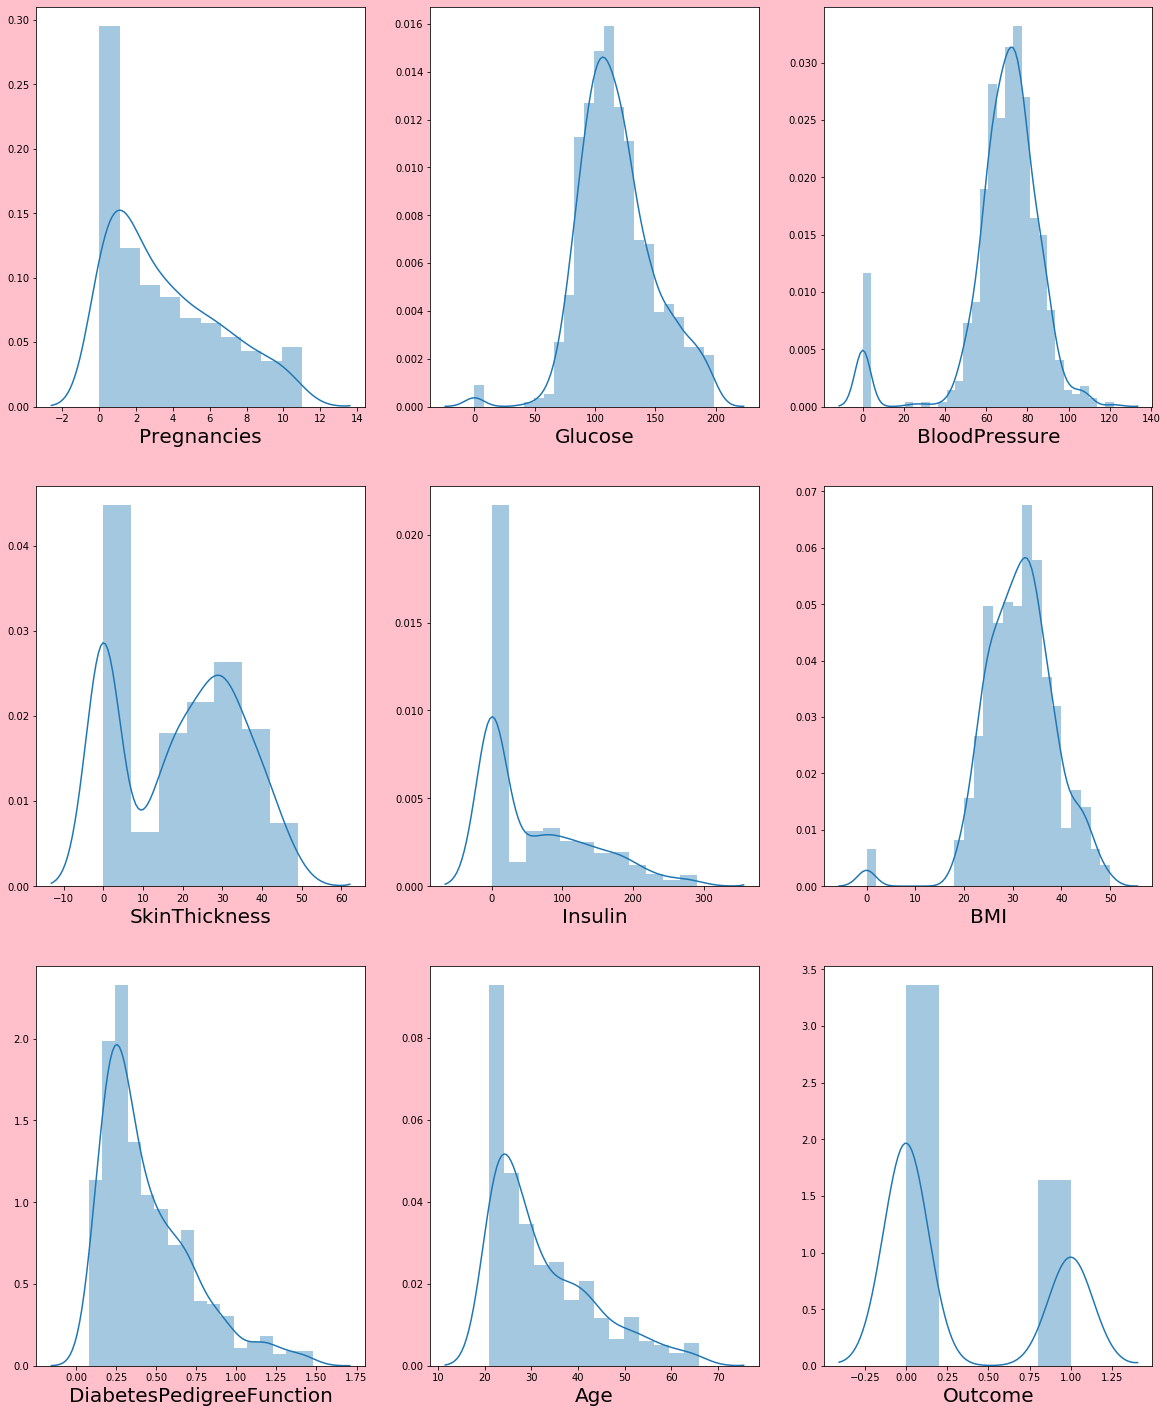

In [65]:
plt.figure(figsize=(20,25), facecolor='pink')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [66]:
X = diabetes.drop(columns = ['Outcome'])
y = diabetes['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories: As one can denote as each of the classes increase the probability of a patient being diagnosed with diabetes also increases. 

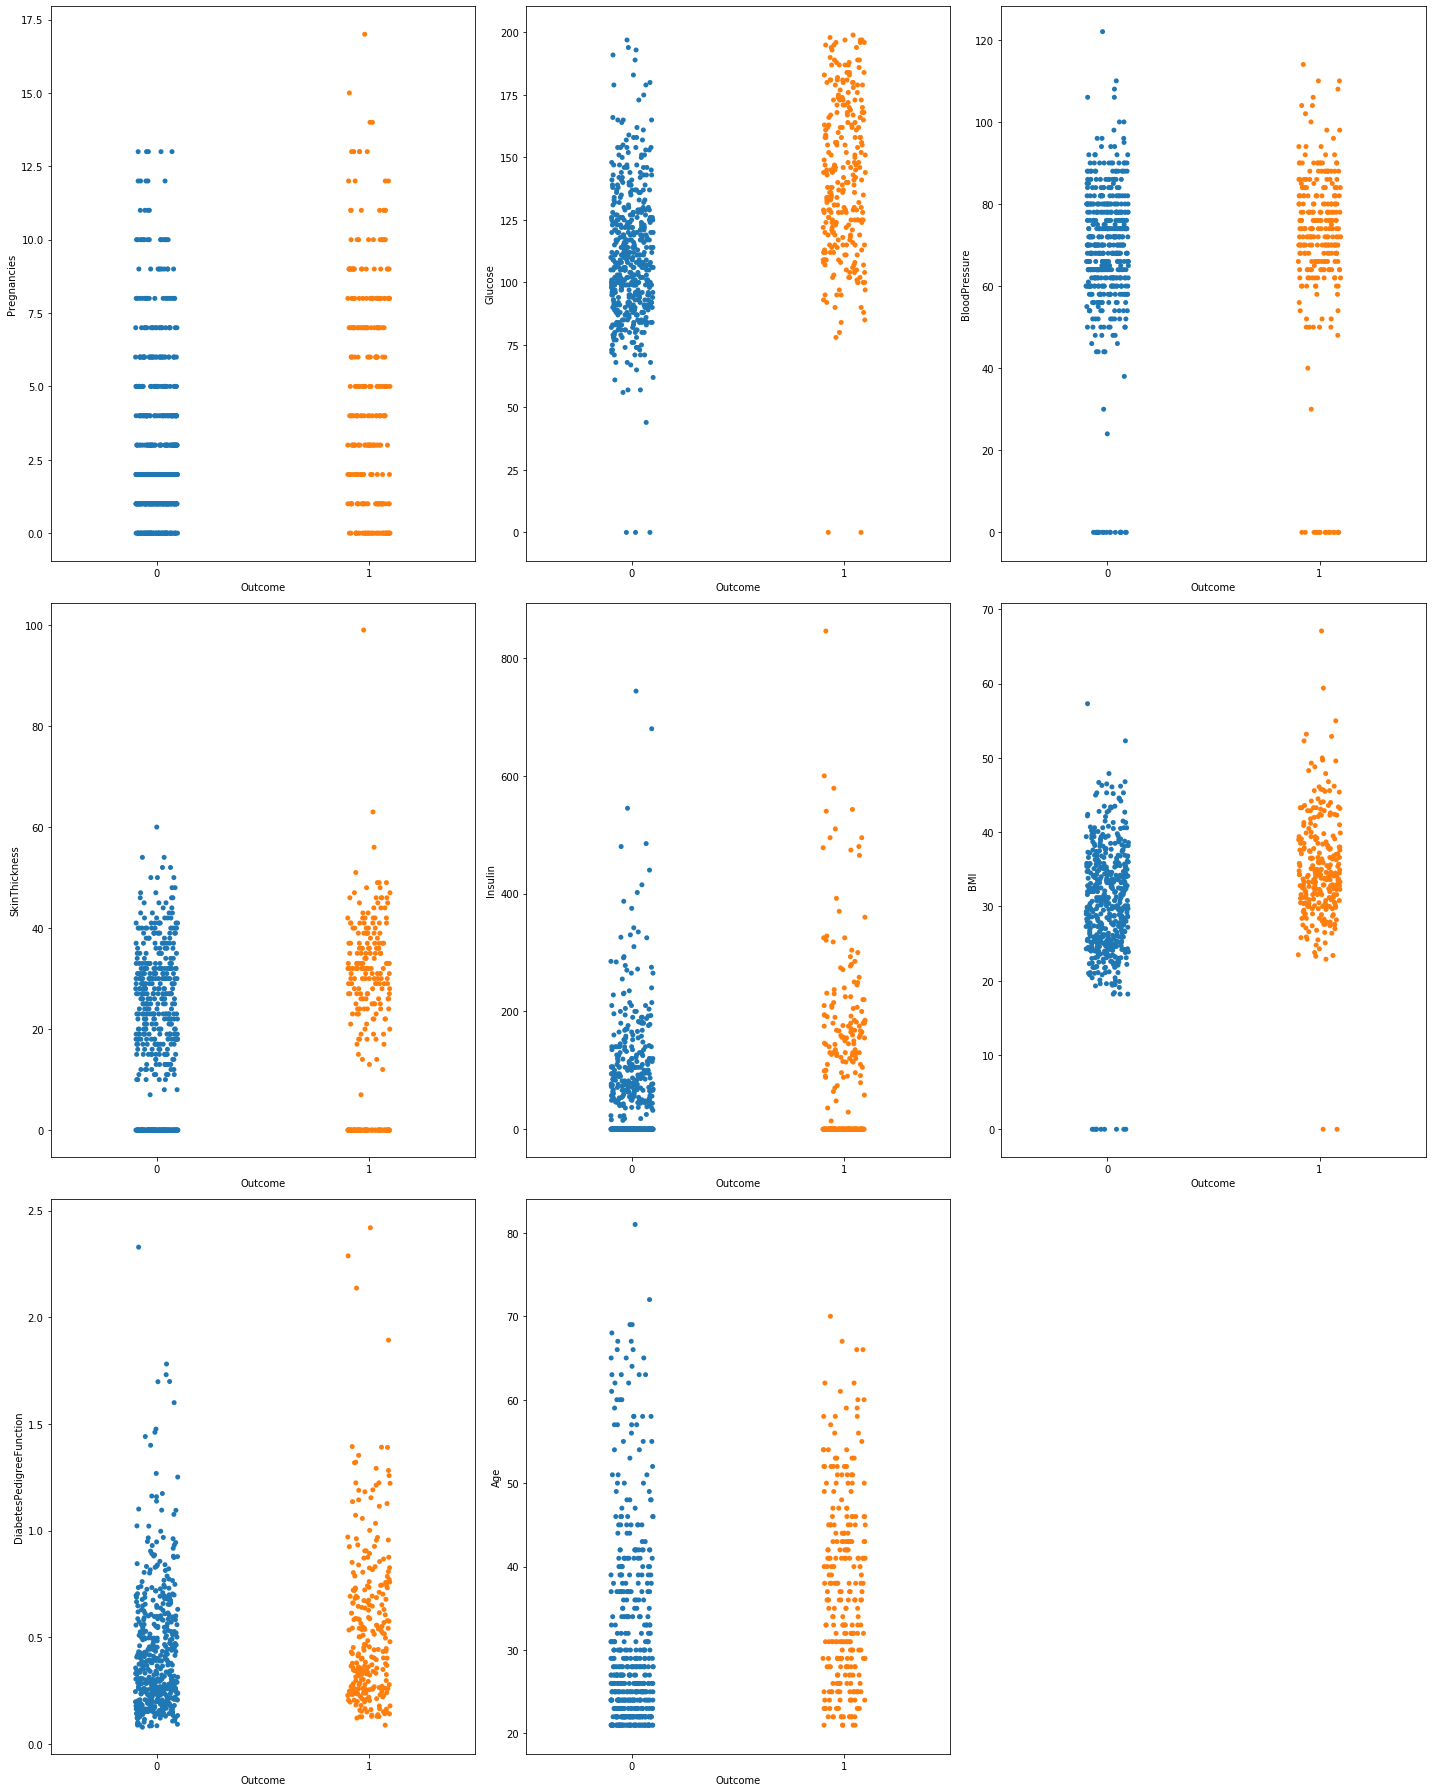

In [67]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

## Scale features
Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [68]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [69]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Assess Multicollinearity
All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [70]:
vif = pd.DataFrame()
vif["Variance inflation factor"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,Variance inflation factor,Features
0,1.430872,Pregnancies
1,1.298961,Glucose
2,1.181863,BloodPressure
3,1.507432,SkinThickness
4,1.427536,Insulin
5,1.297450,BMI
6,1.067090,DiabetesPedigreeFunction
7,1.588368,Age


# Model Building

## Split Test and Train data

Split our data into training data and testing data to test model. Random state utilized to ensure consistent values.



In [71]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355433333)

In [72]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

# Model Results and Performance

Below are the probabilites of each outcome. If probabilities. >50% = class 0, if <50% = class 1.
Therefore by looking at the probabilities one could denote for example 0.88, 0.65, .90 would be class 0. The next one 0.25 would fall into class 1. 

In [91]:
log_reg.predict_proba(x_test)

array([[0.88743777, 0.11256223],
       [0.65294724, 0.34705276],
       [0.9012626 , 0.0987374 ],
       [0.25085199, 0.74914801],
       [0.96429361, 0.03570639],
       [0.80294778, 0.19705222],
       [0.94339524, 0.05660476],
       [0.52570717, 0.47429283],
       [0.83610742, 0.16389258],
       [0.97430986, 0.02569014],
       [0.8855256 , 0.1144744 ],
       [0.35728758, 0.64271242],
       [0.59218068, 0.40781932],
       [0.73555962, 0.26444038],
       [0.90855784, 0.09144216],
       [0.79109229, 0.20890771],
       [0.30785064, 0.69214936],
       [0.77915586, 0.22084414],
       [0.50295763, 0.49704237],
       [0.90462927, 0.09537073],
       [0.92791088, 0.07208912],
       [0.2982658 , 0.7017342 ],
       [0.45542995, 0.54457005],
       [0.68346221, 0.31653779],
       [0.76609034, 0.23390966],
       [0.00448421, 0.99551579],
       [0.3853186 , 0.6146814 ],
       [0.72437731, 0.27562269],
       [0.61502056, 0.38497944],
       [0.81300099, 0.18699901],
       [0.

## Accuracy


Accuracy supports the predictions of the model against original values. Accuracy metrics help us determine or predict the true diabetic person out of the population. It is the fraction of predicted diabetic patients that the model got right. 

In [73]:
y_pred = log_reg.predict(x_test)

Prediction of either class 0 or class 1 depending on the values above if they are less or more than 50%.

In [85]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [74]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.75

## Confusion Matrix


The confusion matrix describes the performance of the classification model, which compares predicted classes to original/actual classes. 

The summery of number of correct and incorrect predictions with count values segregated by classes. 

In [75]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[111,  13],
       [ 35,  33]])

This confusion matrix shows that:
- 111 are True positive meaning the actual class was the same as the predicted class. 
- 33 are True negative meaning the actual and predicted class matched. 

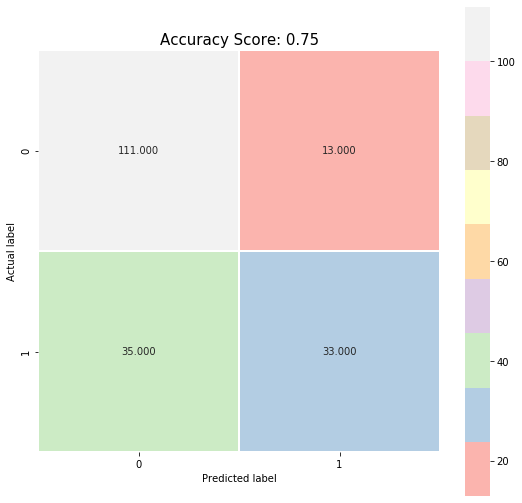

In [96]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

Another way to quantitatively interpret the confusion matrix. 

In [76]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [77]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.75

## Precision

What are the relevant(what you have predicted and actual are matching. ) positive diabetic patients out of entire positive diabetic predictions. 

In [78]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8951612903225806

## Recall

Fraction of actual diabetic patients to the number of diabetic patients retrieved from population. 

In [79]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7602739726027398

## F1_Score

Harmonic mean of precision and recall. We consider F1_score because it balances between precision and recall. 

In [80]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8222222222222222

## Area Under Curve


Measure for a model how it can distinguish two seperate groups under the target variable. The more area under the curve the better the model. Area under curve should be high. BLue is threshold. 

In [81]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6902277039848197

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

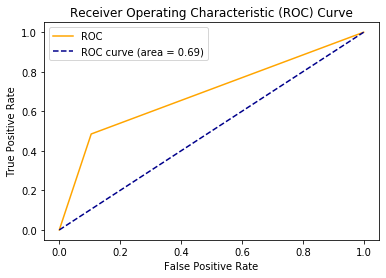

In [83]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Conclusion Summary

Logistic regression is a regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. In this particular study we utilized the diabetes dataset to determine whether the features could accuratly predict whether a patient would have diabates. After modeling our data we were able to produce convincing results that the features in this dataset do in fact increase the odds and the probability of a patient being diagnosed with diabetes.